# Introduction 

1. **Notebook Description** In this notebook, I conduct exploratory data analysis (EDA)on final results
2. **Author** Filippo Radice Fossati
3. **Date** 09/22/2023

# Notebook Structure 

This notebook is structured as follows:

1. **Section 1**: Importing necessary libraries and datasets.
2. **Section 2**: EDA on Asset Level Dependency Score
3. **Section 3**: EDA on Asset Type Level Dependency Score
3. **Section 4**: EDA on Aggregate Score and weights

# Section 1 - Import Libraries & Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import seaborn as sns
import matplotlib.pyplot as plt


import rasterio
import osmnx as ox
import geopandas as gpd

import support_function as sf

%load_ext autoreload
%autoreload 2
#to suppress scientifc notation
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (6, 6), 'axes.edgecolor': '0.2'})

In [2]:
#loading all outcome df coming from notebook 4.Water_Risk_Methodology
asset_dependency = pd.read_csv('./_data/asset_level_dependency_score.csv')
asset_type_dependency = pd.read_csv('./_data/all_scores_asset_type.csv')
asset_type_weight = pd.read_csv('./_data/asset_type_weight.csv')
aggregate_score = pd.read_csv('./_data/aggregate_score.csv')
#world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/kz/gkm958296f79lgmty6dfw0xc0000gn/T/ipykernel_27940/2807635331.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [3]:
#saving off for later company name
company_name = asset_dependency[['ultimate_parent_isin','ultimate_parent_name']].drop_duplicates().copy()
company_name

,ultimate_parent_isin,ultimate_parent_name
0,JE00B4T3BW64,Glencore plc
4,AU000000BHP4,BHP Group
23,US35671D8570,Freeport-McMoRan Inc.


# Section 2 - Visualization for Asset Level Dependency Score

In [4]:
columns_list = ['ultimate_parent_isin','ultimate_parent_name','materiality_score', 'resilience_score','dependency_score']
#dividing dataset
ground = asset_dependency[asset_dependency['ecosystem_service']=='Ground water'].copy()
surface = asset_dependency[asset_dependency['ecosystem_service']=='Surface water'].copy()

In [5]:
#subsetting df for what needed
g_asset_level_score = ground[columns_list].copy()
s_asset_level_score = surface[columns_list].copy()
#renaming column so I will have only one dataset
g_asset_level_score.columns = ['ground_' + x if x not in ('ultimate_parent_isin','ultimate_parent_name') else x for x in g_asset_level_score.columns]
s_asset_level_score.columns = ['surface_' + x if x not in ('ultimate_parent_isin','ultimate_parent_name') else x for x in s_asset_level_score.columns]

all_water_asset_level_score = g_asset_level_score.merge(s_asset_level_score)
all_water_asset_level_score

,ultimate_parent_isin,ultimate_parent_name,ground_materiality_score,ground_resilience_score,ground_dependency_score,surface_materiality_score,surface_resilience_score,surface_dependency_score
0,JE00B4T3BW64,Glencore plc,1.00,0.92,0.92,1.00,0.92,0.92
1,JE00B4T3BW64,Glencore plc,1.00,0.92,0.92,1.00,0.92,0.92
2,JE00B4T3BW64,Glencore plc,1.00,0.92,0.92,1.00,0.92,0.92
3,JE00B4T3BW64,Glencore plc,1.00,0.92,0.92,1.00,0.92,0.92
4,JE00B4T3BW64,Glencore plc,1.00,0.92,0.92,0.20,0.71,0.14
...,...,...,...,...,...,...,...,...
184672,US35671D8570,Freeport-McMoRan Inc.,0.60,0.85,0.51,0.80,0.82,0.66
184673,US35671D8570,Freeport-McMoRan Inc.,0.60,0.85,0.51,0.80,0.82,0.66
184674,US35671D8570,Freeport-McMoRan Inc.,0.60,0.85,0.51,0.80,0.87,0.69
184675,US35671D8570,Freeport-McMoRan Inc.,0.60,0.85,0.51,0.80,0.87,0.69


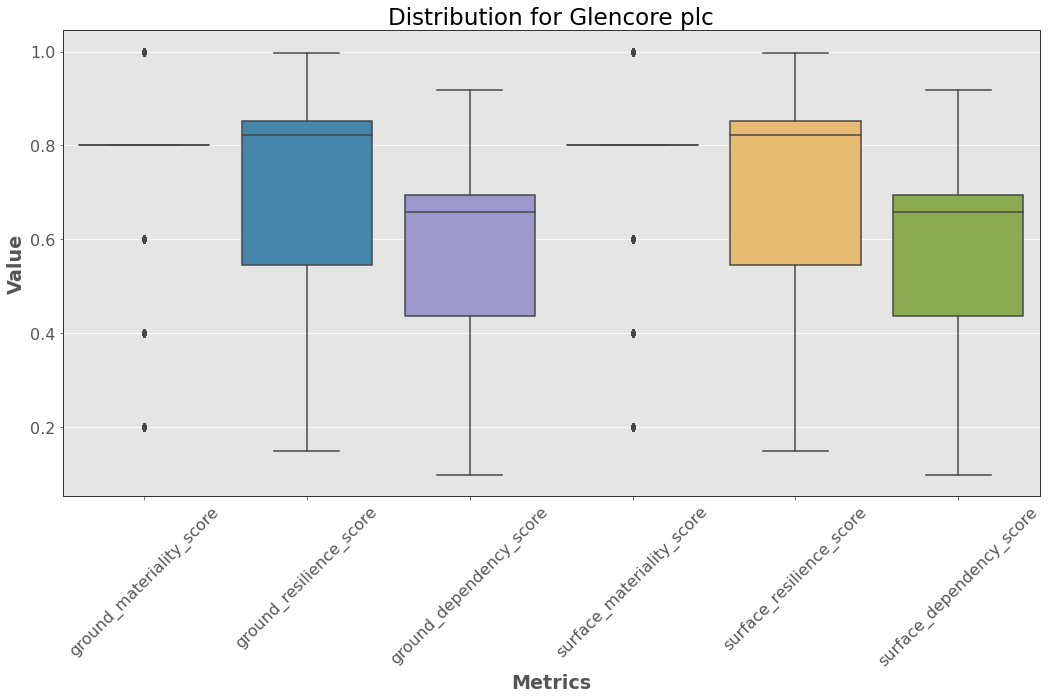

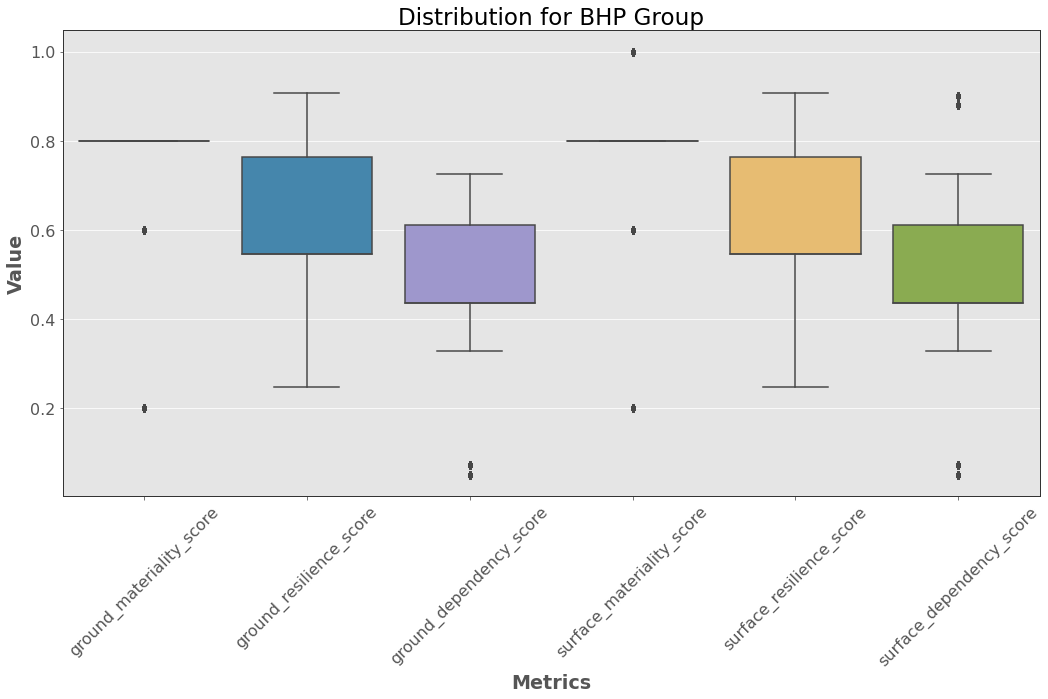

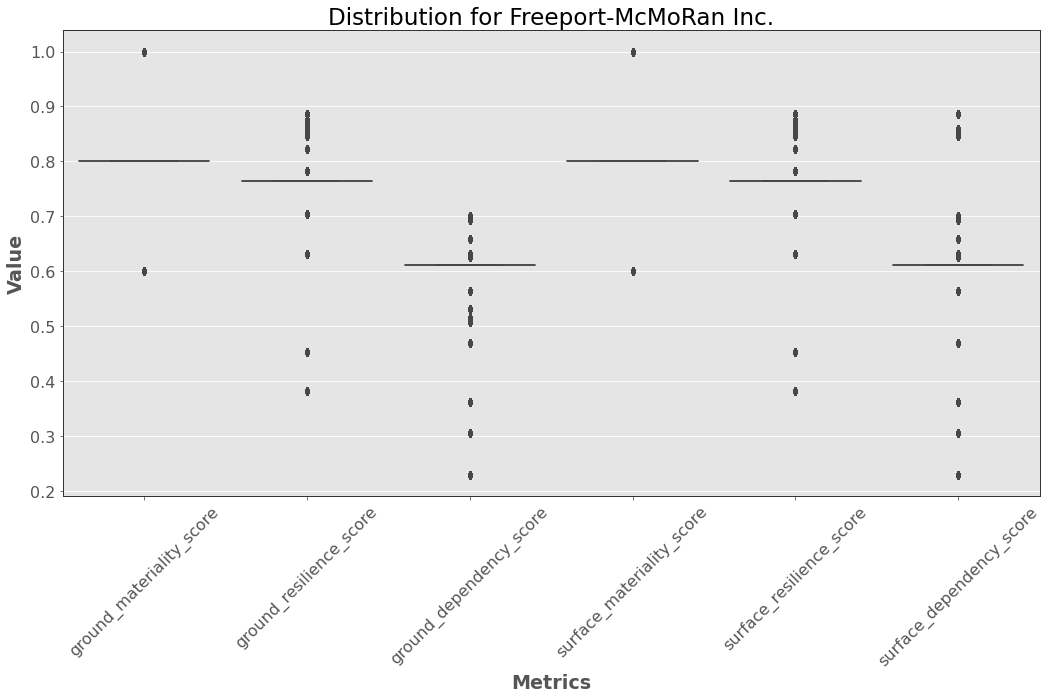

In [6]:
columns_list = [x for x in all_water_asset_level_score.columns[2:]] 
for company in all_water_asset_level_score['ultimate_parent_name'].unique():
    sf.create_single_company_boxplot(all_water_asset_level_score, company, columns_list, company_col='ultimate_parent_name')

In [7]:
for company in g_asset_level_score['ultimate_parent_name'].unique():
    print(company)
    print (g_asset_level_score[g_asset_level_score['ultimate_parent_name']==company].describe())

Glencore plc
       ground_materiality_score  ground_resilience_score  \
count                    356.00                   356.00   
mean                       0.79                     0.71   
std                        0.11                     0.18   
min                        0.20                     0.15   
25%                        0.80                     0.55   
50%                        0.80                     0.82   
75%                        0.80                     0.85   
max                        1.00                     1.00   

       ground_dependency_score  
count                   356.00  
mean                      0.56  
std                       0.18  
min                       0.10  
25%                       0.44  
50%                       0.66  
75%                       0.69  
max                       0.92  
BHP Group
       ground_materiality_score  ground_resilience_score  \
count                    154.00                   154.00   
mean               

In [8]:
for company in s_asset_level_score['ultimate_parent_name'].unique():
    print(company)
    print (s_asset_level_score[s_asset_level_score['ultimate_parent_name']==company].describe())

Glencore plc
       surface_materiality_score  surface_resilience_score  \
count                     356.00                    356.00   
mean                        0.80                      0.71   
std                         0.11                      0.18   
min                         0.20                      0.15   
25%                         0.80                      0.55   
50%                         0.80                      0.82   
75%                         0.80                      0.85   
max                         1.00                      1.00   

       surface_dependency_score  
count                    356.00  
mean                       0.57  
std                        0.18  
min                        0.10  
25%                        0.44  
50%                        0.66  
75%                        0.69  
max                        0.92  
BHP Group
       surface_materiality_score  surface_resilience_score  \
count                     154.00                  

In [9]:
# Using the function to understand number of asset in countries with max resilience score 
summary = sf.get_country_company_max_resilience(ground)
summary

,ultimate_parent_name,country_name,count,percentage,max_resilience_score
0,BHP Group,Australia,102,66.23,0.88
1,Glencore plc,Australia,75,21.07,0.88
2,BHP Group,Brazil,6,3.90,0.92
3,Glencore plc,Brazil,4,1.12,0.92
4,BHP Group,Canada,4,2.60,0.85
5,Freeport-McMoRan Inc.,Canada,1,0.54,0.85
6,Glencore plc,Canada,64,17.98,0.85
7,BHP Group,Chile,12,7.79,0.90
8,Freeport-McMoRan Inc.,Chile,4,2.16,0.90
9,Glencore plc,Chile,6,1.69,0.90


In [10]:
summary[summary['ultimate_parent_name']=='BHP Group'].sort_values(by='max_resilience_score', ascending=False)

,ultimate_parent_name,country_name,count,percentage,max_resilience_score
2,BHP Group,Brazil,6,3.90,0.92
18,BHP Group,Tanzania,1,0.65,0.91
7,BHP Group,Chile,12,7.79,0.90
10,BHP Group,Democratic Republic of Congo,1,0.65,0.89
23,BHP Group,United States of America,8,5.19,0.89
0,BHP Group,Australia,102,66.23,0.88
13,BHP Group,Peru,1,0.65,0.87
16,BHP Group,South Africa,10,6.49,0.85
4,BHP Group,Canada,4,2.60,0.85
12,BHP Group,Ecuador,1,0.65,0.84


In [11]:
summary[summary['ultimate_parent_name']=='Freeport-McMoRan Inc.'].sort_values(by='max_resilience_score', ascending=False)

,ultimate_parent_name,country_name,count,percentage,max_resilience_score
8,Freeport-McMoRan Inc.,Chile,4,2.16,0.90
24,Freeport-McMoRan Inc.,United States of America,153,82.70,0.89
26,Freeport-McMoRan Inc.,Indonesia,12,6.49,0.88
14,Freeport-McMoRan Inc.,Peru,3,1.62,0.87
5,Freeport-McMoRan Inc.,Canada,1,0.54,0.85
29,Freeport-McMoRan Inc.,Spain,7,3.78,0.85
21,Freeport-McMoRan Inc.,United Kingdom,1,0.54,0.68
27,Freeport-McMoRan Inc.,Netherlands,4,2.16,0.38


In [12]:
summary[summary['ultimate_parent_name']=='Glencore plc'].sort_values(by='max_resilience_score', ascending=False)

,ultimate_parent_name,country_name,count,percentage,max_resilience_score
40,Glencore plc,Mauritania,3,0.84,1.00
34,Glencore plc,Egypt,2,0.56,0.95
3,Glencore plc,Brazil,4,1.12,0.92
32,Glencore plc,Argentina,5,1.40,0.91
31,Glencore plc,Algeria,1,0.28,0.90
9,Glencore plc,Chile,6,1.69,0.90
45,Glencore plc,Republic of the Congo,1,0.28,0.89
11,Glencore plc,Democratic Republic of Congo,8,2.25,0.89
25,Glencore plc,United States of America,2,0.56,0.89
1,Glencore plc,Australia,75,21.07,0.88


In [13]:
summary.ultimate_parent_name.unique()

array(['BHP Group', 'Glencore plc', 'Freeport-McMoRan Inc.'], dtype=object)

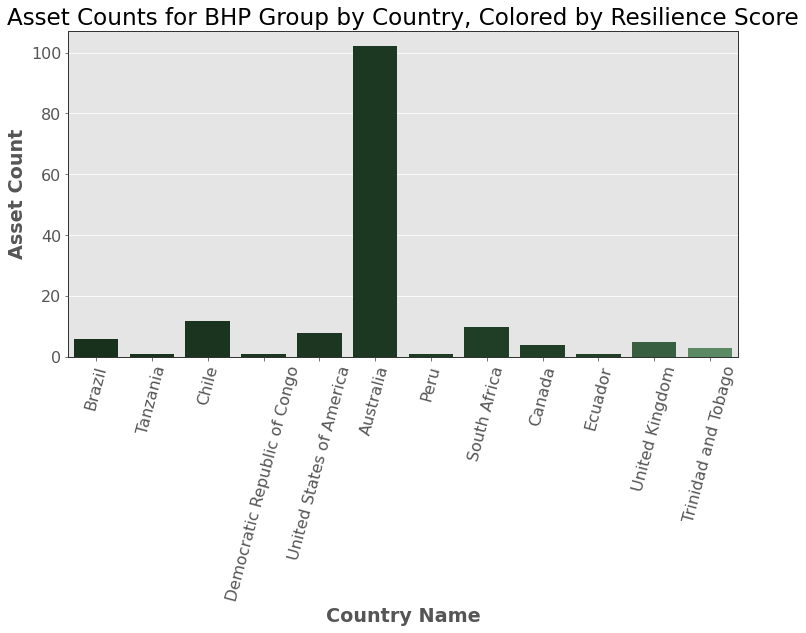

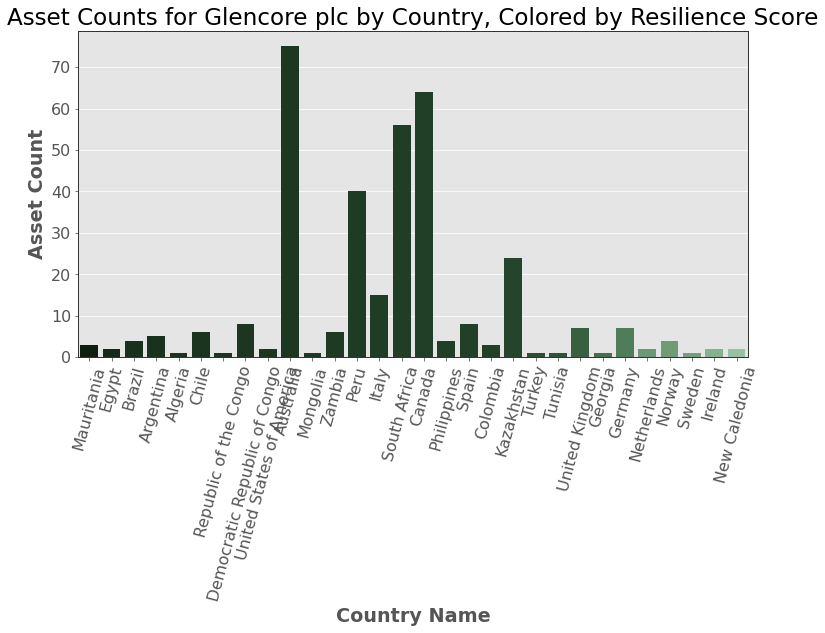

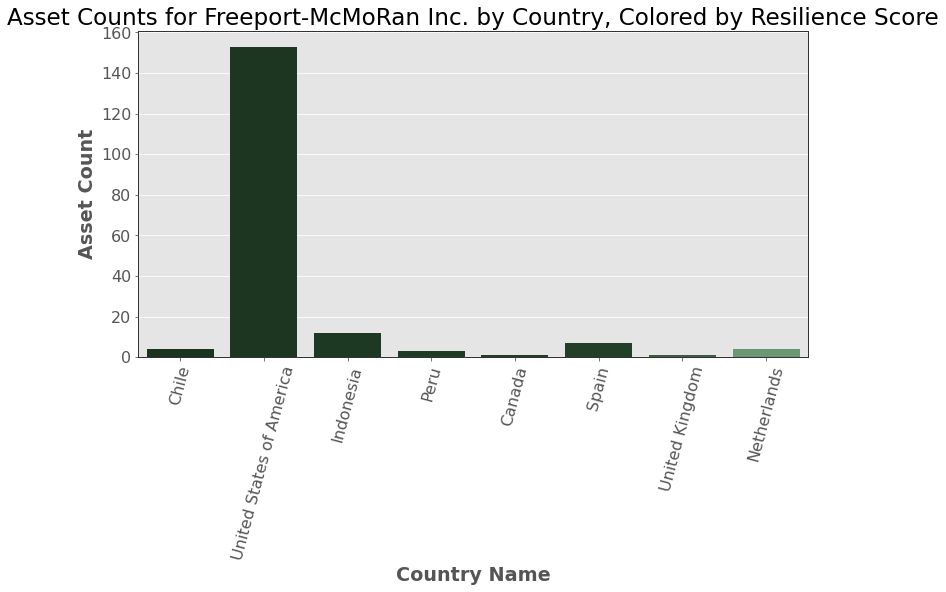

In [14]:
#plotting summary results
# From higher risk to lower risk country visualizing the count!
sf.plot_individual_company_charts(summary)

In [15]:
summary.columns

Index(['ultimate_parent_name', 'country_name', 'count', 'percentage',
       'max_resilience_score'],
      dtype='object')

/Users/filoradice/Desktop/Nature/Water_Risk_FRF_sent/support_function.py:378: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=row['count'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),


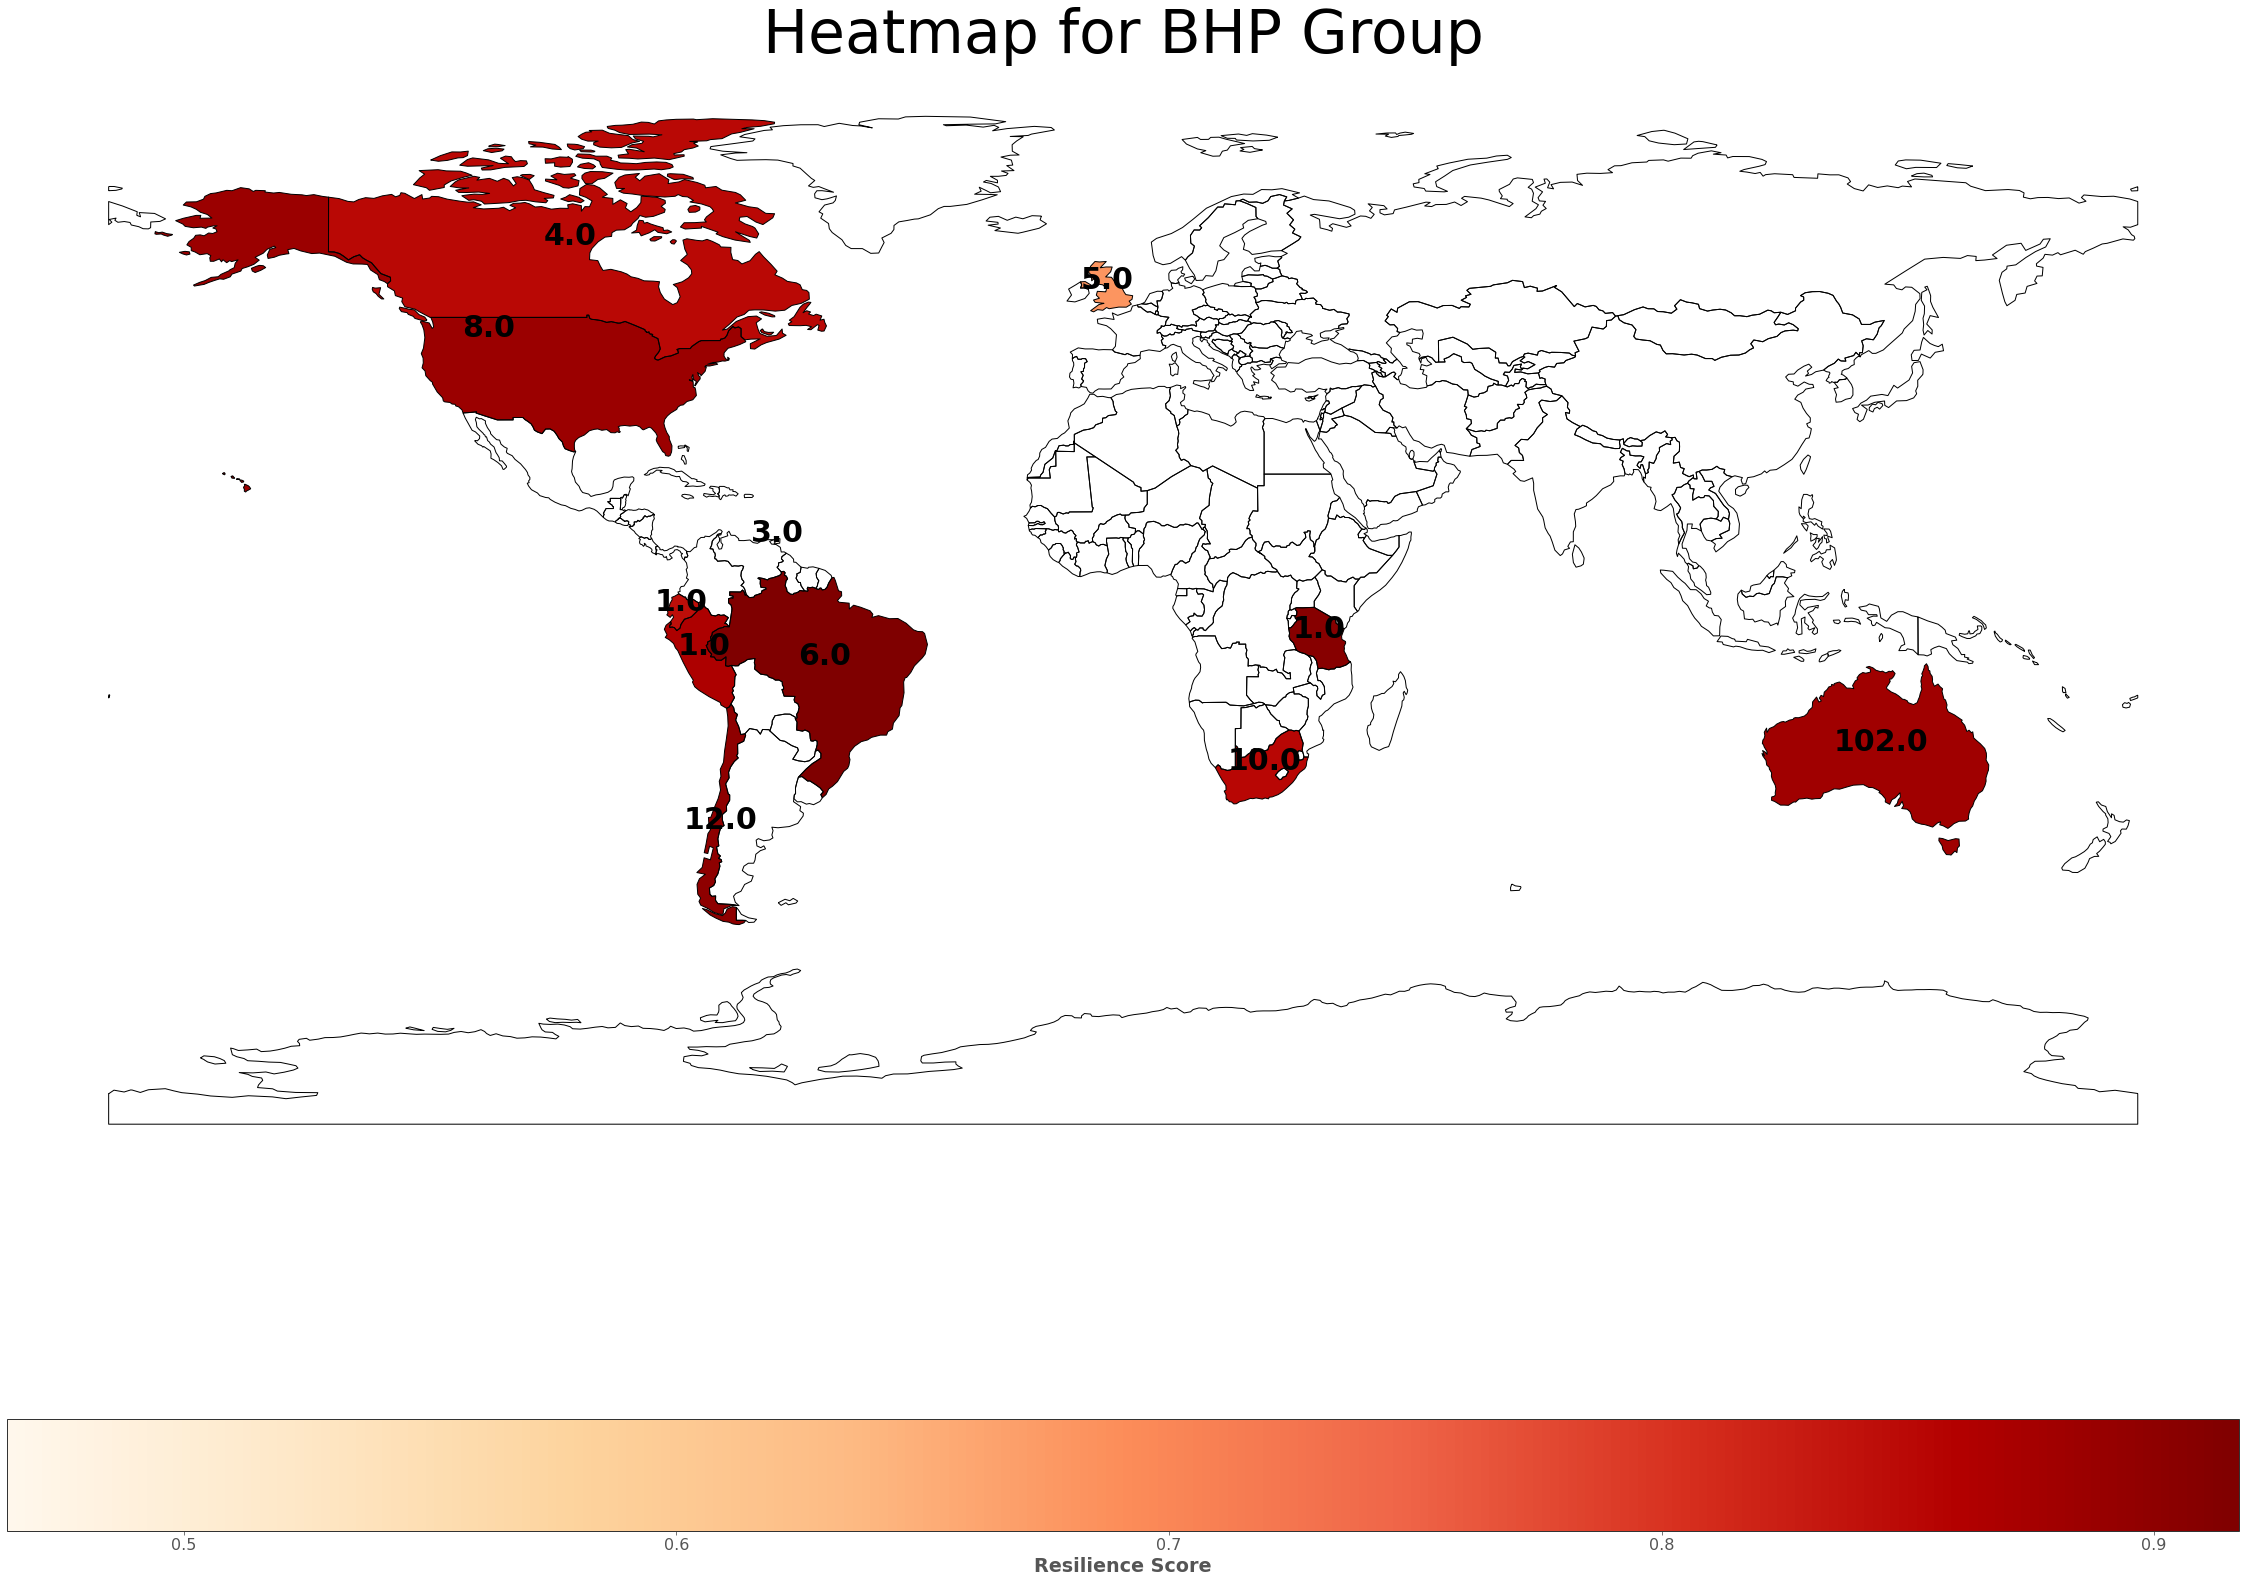

/Users/filoradice/Desktop/Nature/Water_Risk_FRF_sent/support_function.py:378: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=row['count'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),


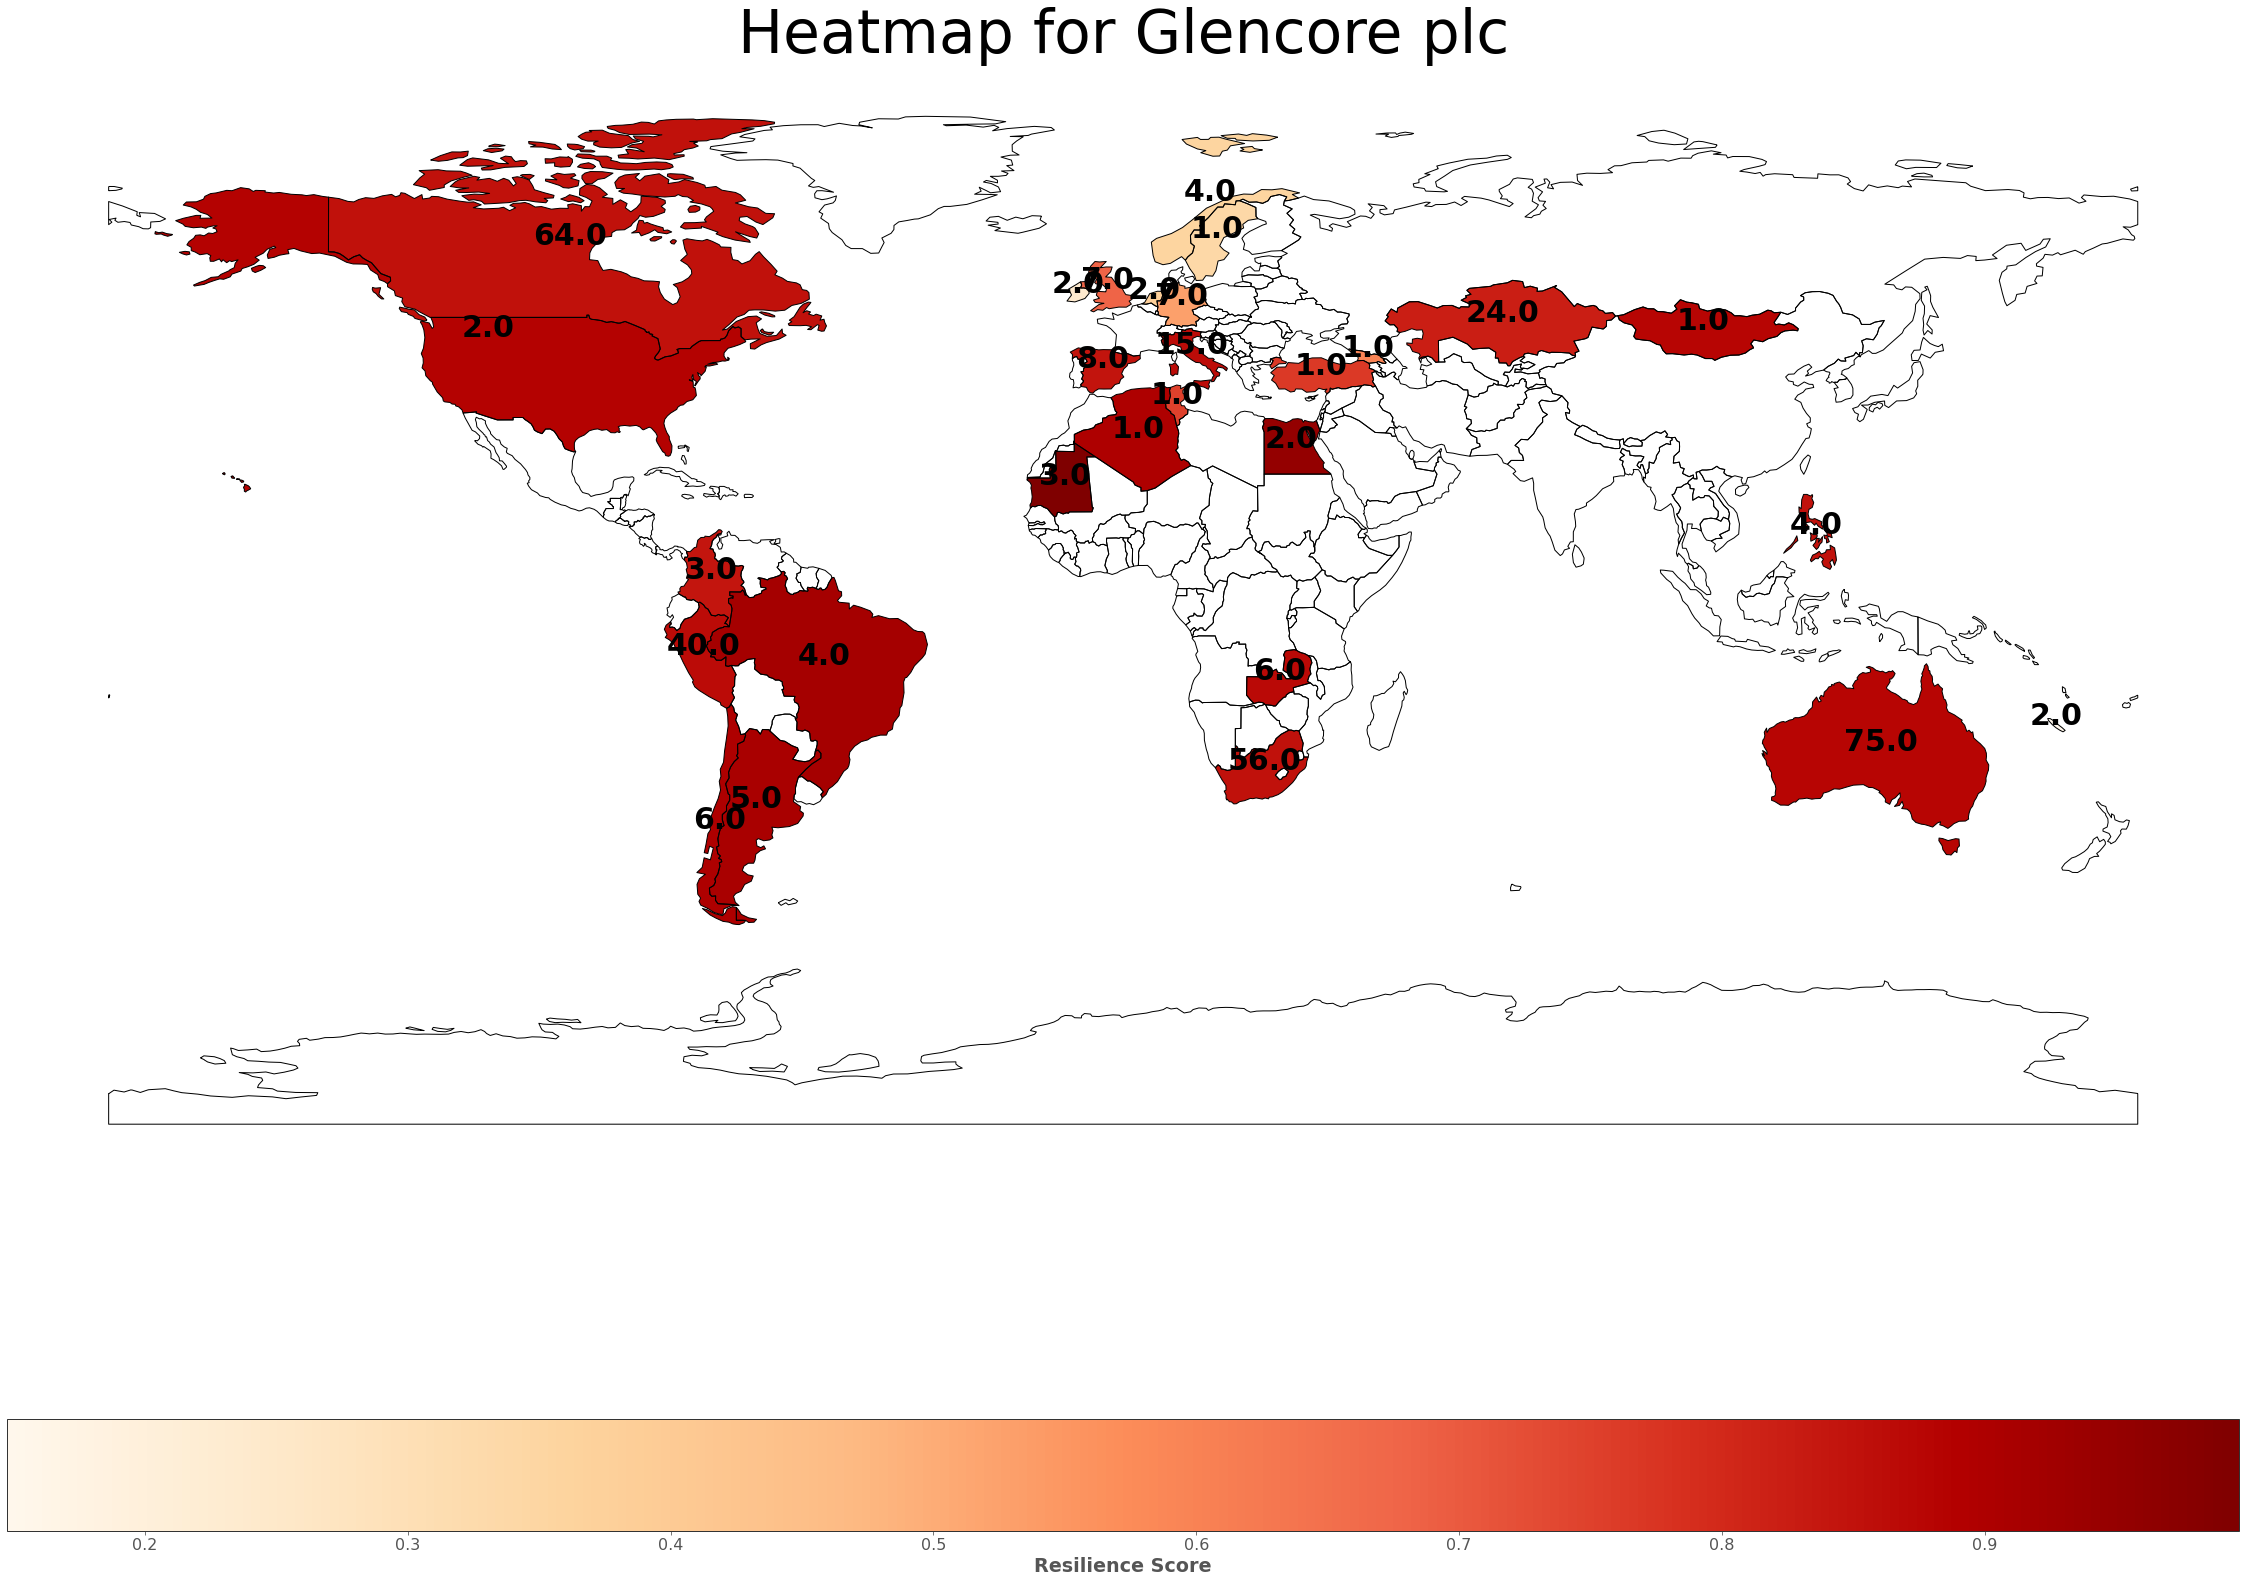

/Users/filoradice/Desktop/Nature/Water_Risk_FRF_sent/support_function.py:378: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=row['count'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),


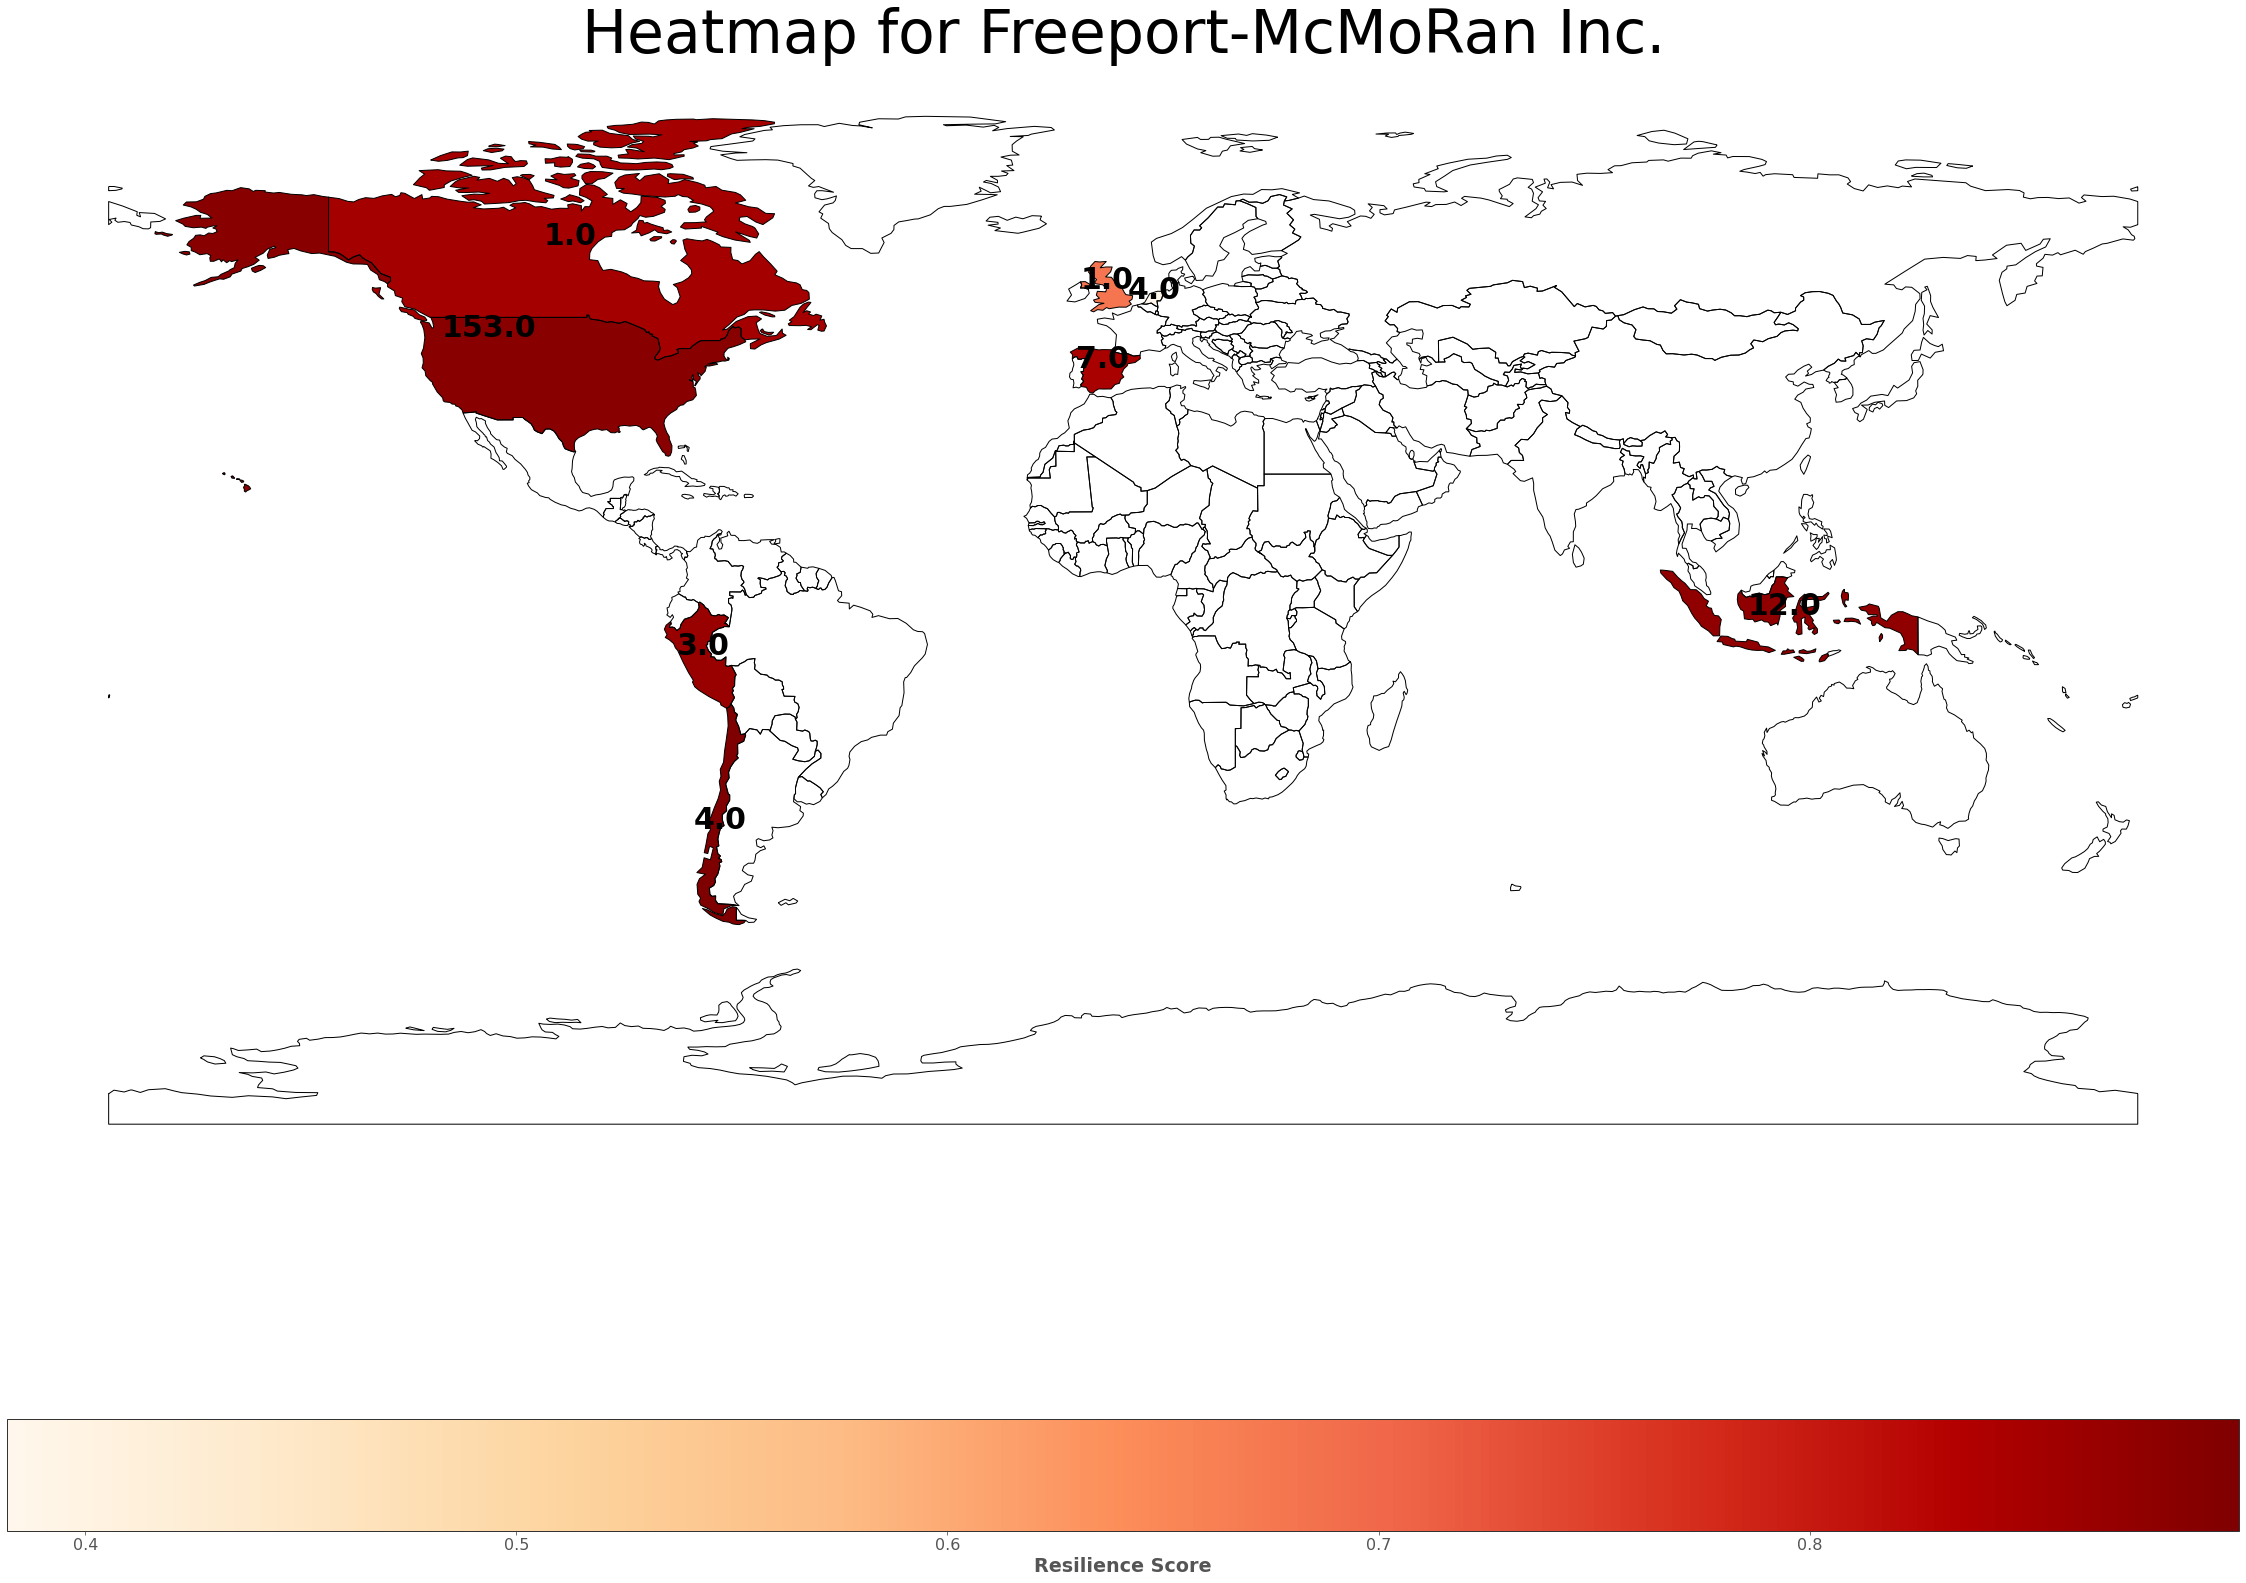

In [16]:
# Let's map the summary results
companies = summary['ultimate_parent_name'].unique()
for company in companies:
    sf.plot_heatmap_for_company(summary, world, company)

# Section 3 -  Asset Type Level EDA

In [17]:
#adding company name
asset_type_dependency_name = asset_type_dependency.merge(company_name).copy()

In [18]:
asset_type_dependency_name.columns

Index(['ultimate_parent_isin', 'process', 'surface_water_resilience_score',
       'surface_water_materiality_score', 'surface_water_dependency_score',
       'ground_water_resilience_score', 'ground_water_materiality_score',
       'ground_water_dependency_score', 'composite_score',
       'ultimate_parent_name'],
      dtype='object')

In [19]:
#materiality = reliance in our case
asset_type_dependency_name = asset_type_dependency_name.rename(
    columns={'surface_water_materiality_score':'surface_water_reliance_score'
             ,'ground_water_materiality_score':'ground_water_reliance_score'})

/Users/filoradice/Desktop/Nature/Water_Risk_FRF_sent/support_function.py:420: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


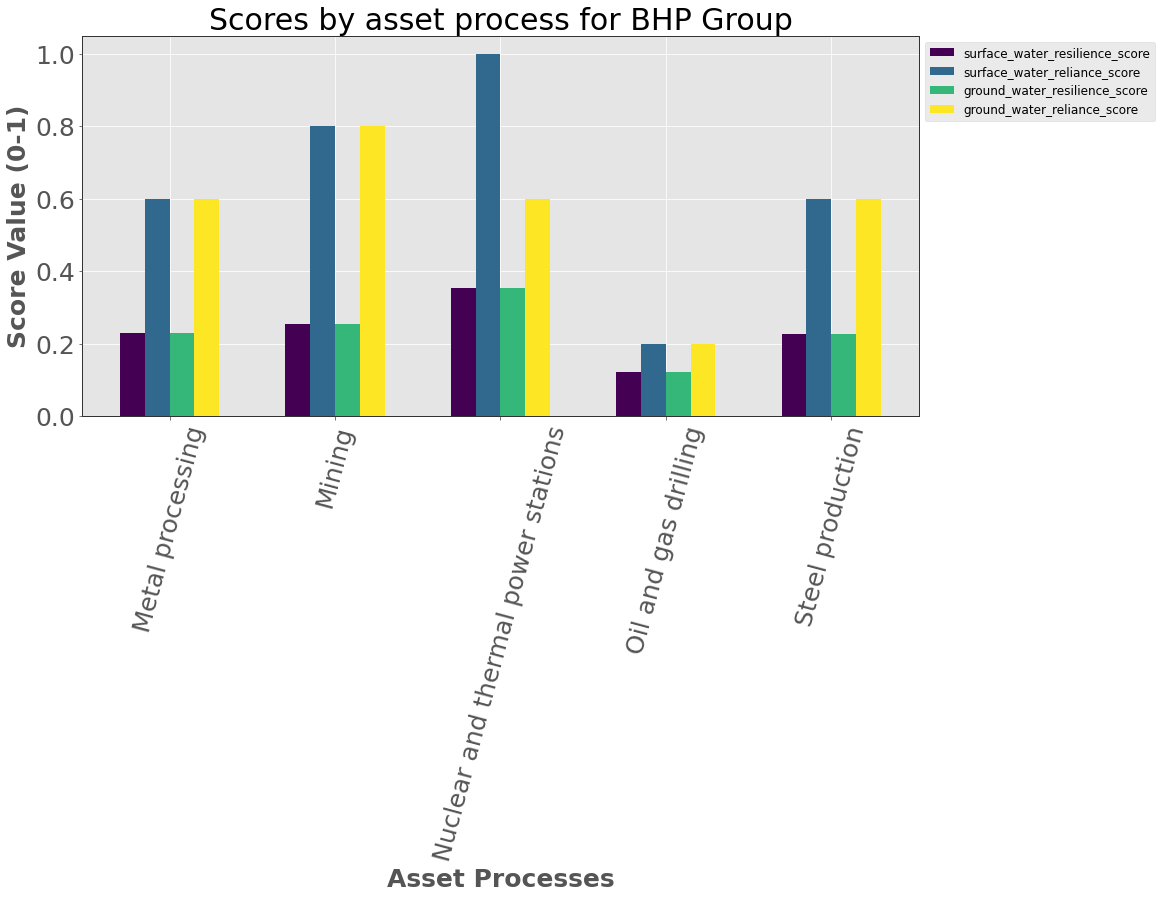

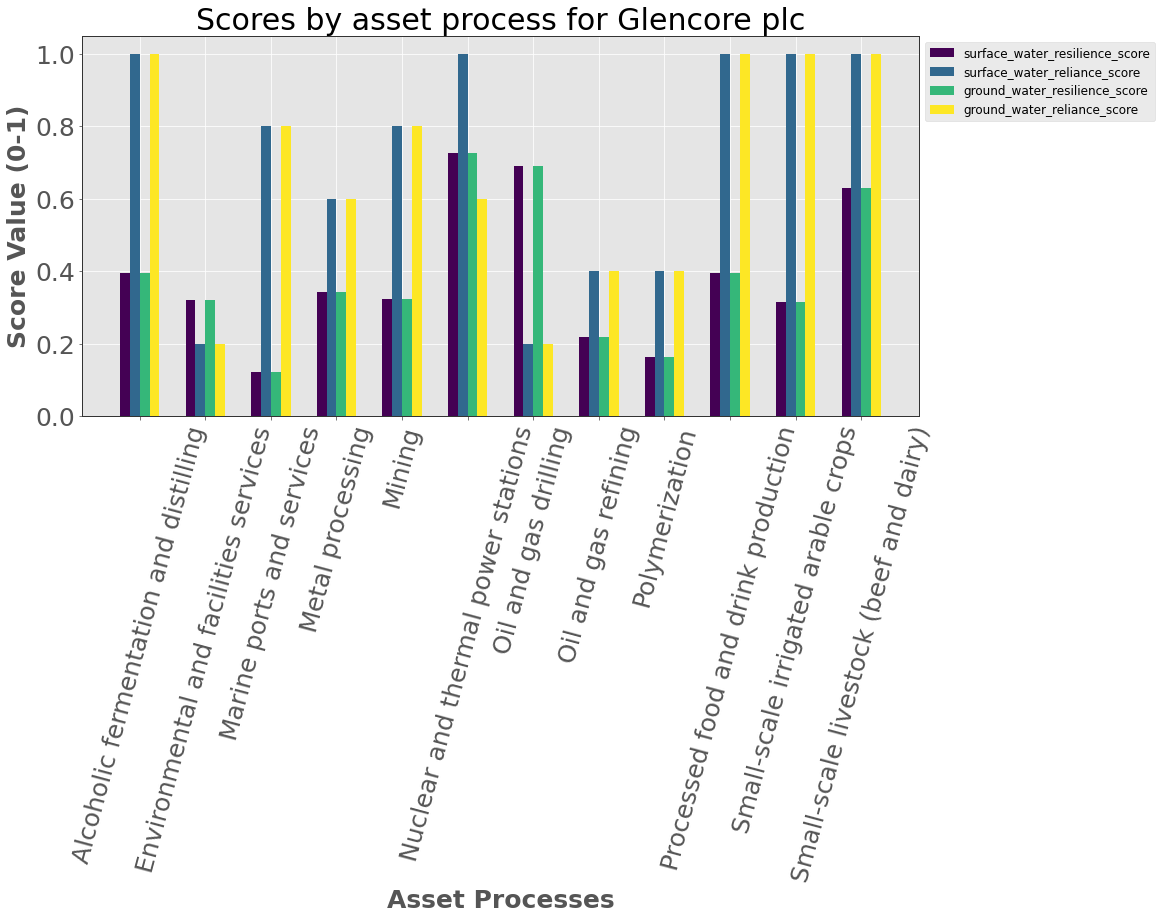

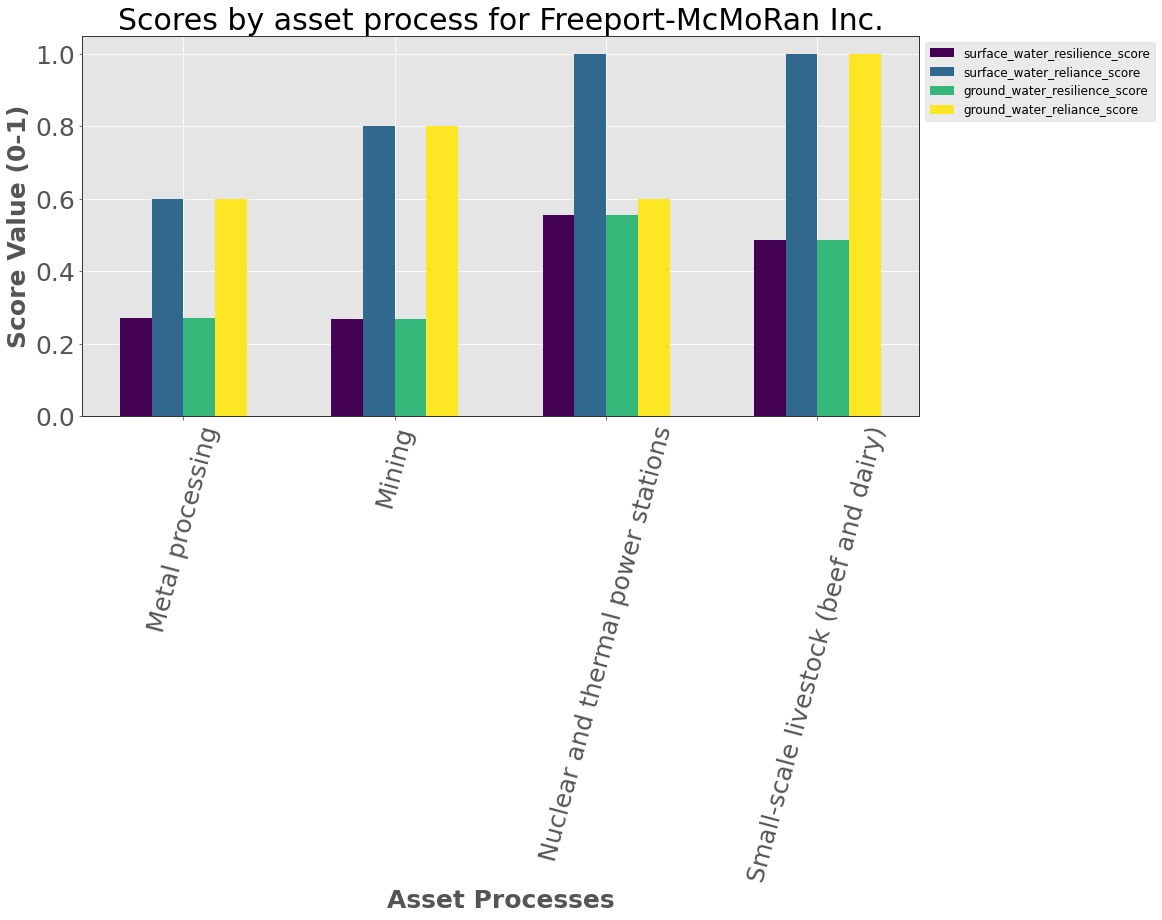

In [20]:

score_names = ['surface_water_resilience_score',
               'surface_water_reliance_score',
               'ground_water_resilience_score',
               'ground_water_reliance_score']



for company in asset_type_dependency_name['ultimate_parent_name'].unique():
    company_df = asset_type_dependency_name[asset_type_dependency_name['ultimate_parent_name'] == company]
    sf.plot_company_scores(company_df,score_names)
    plt.pause(2)




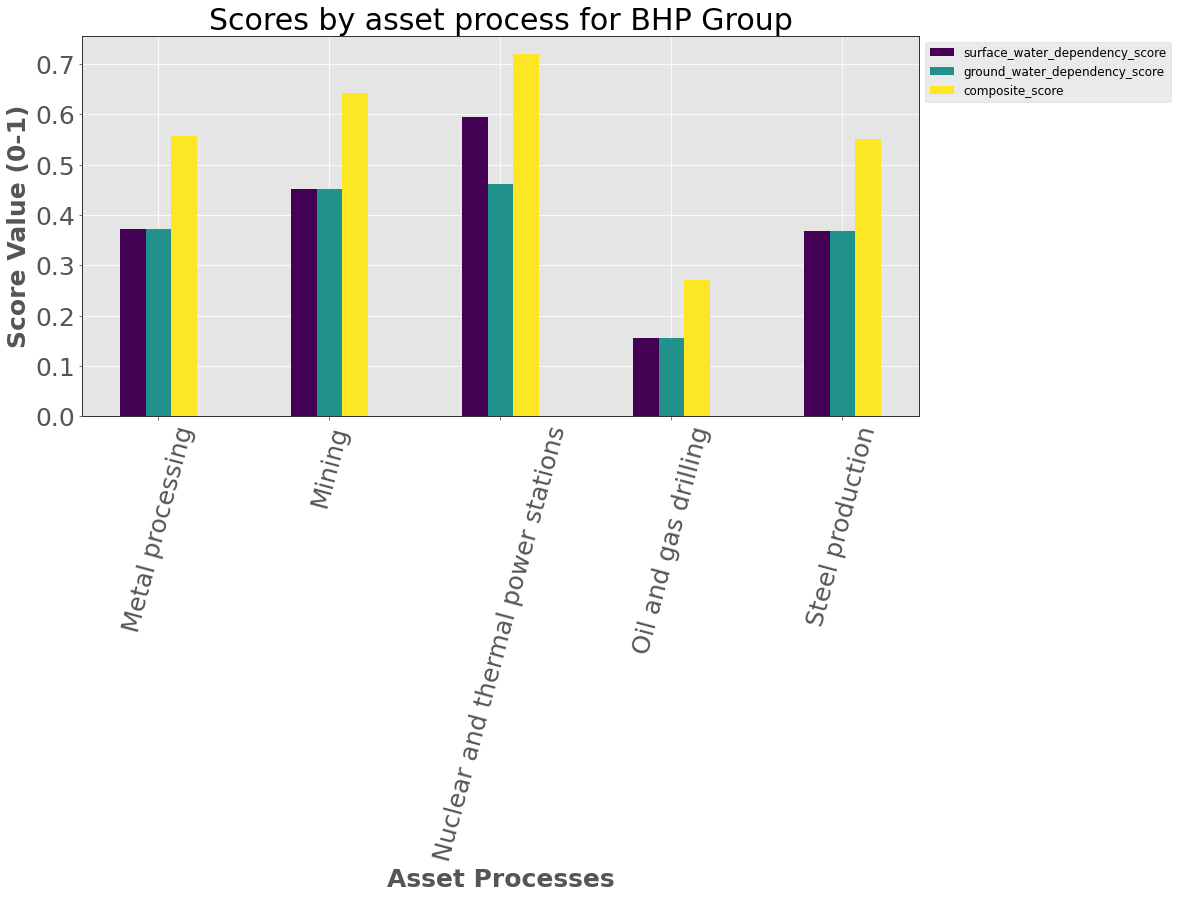

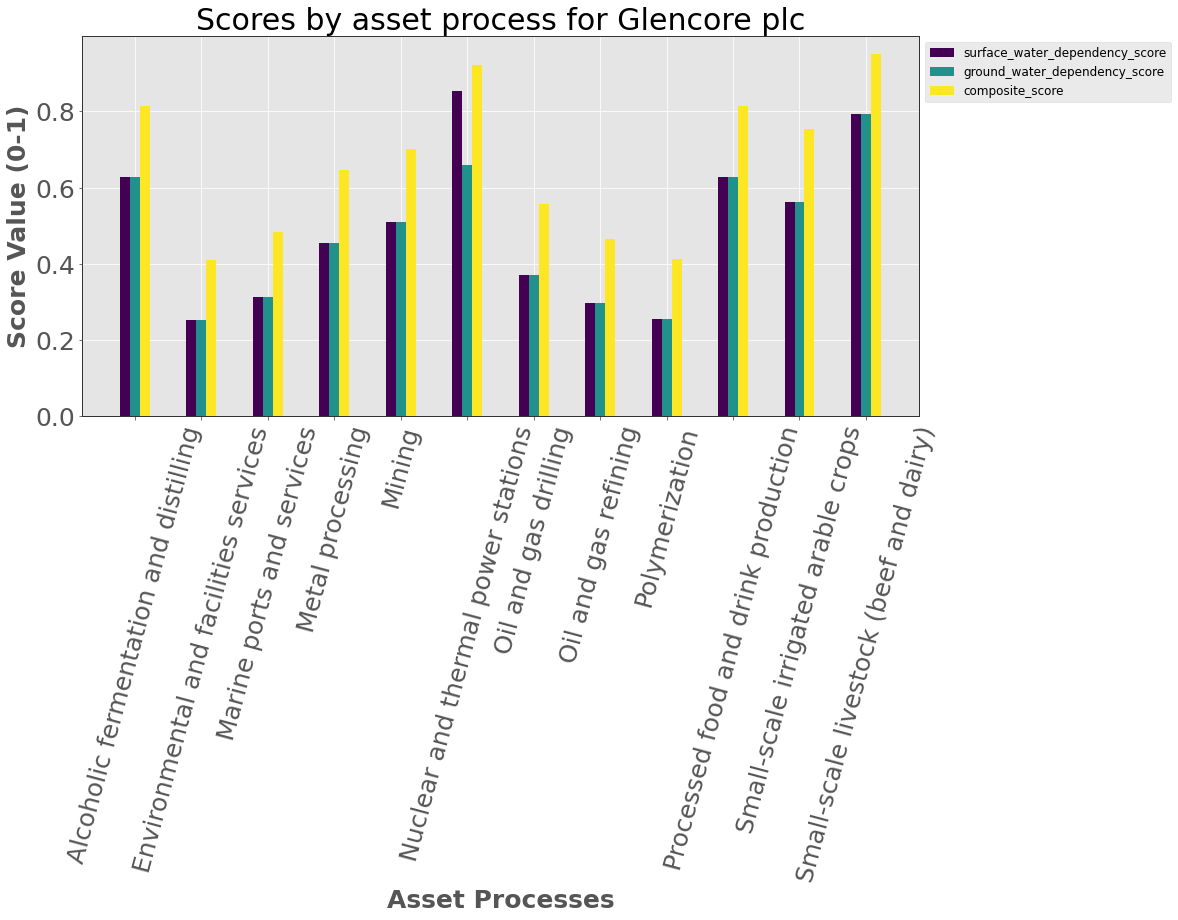

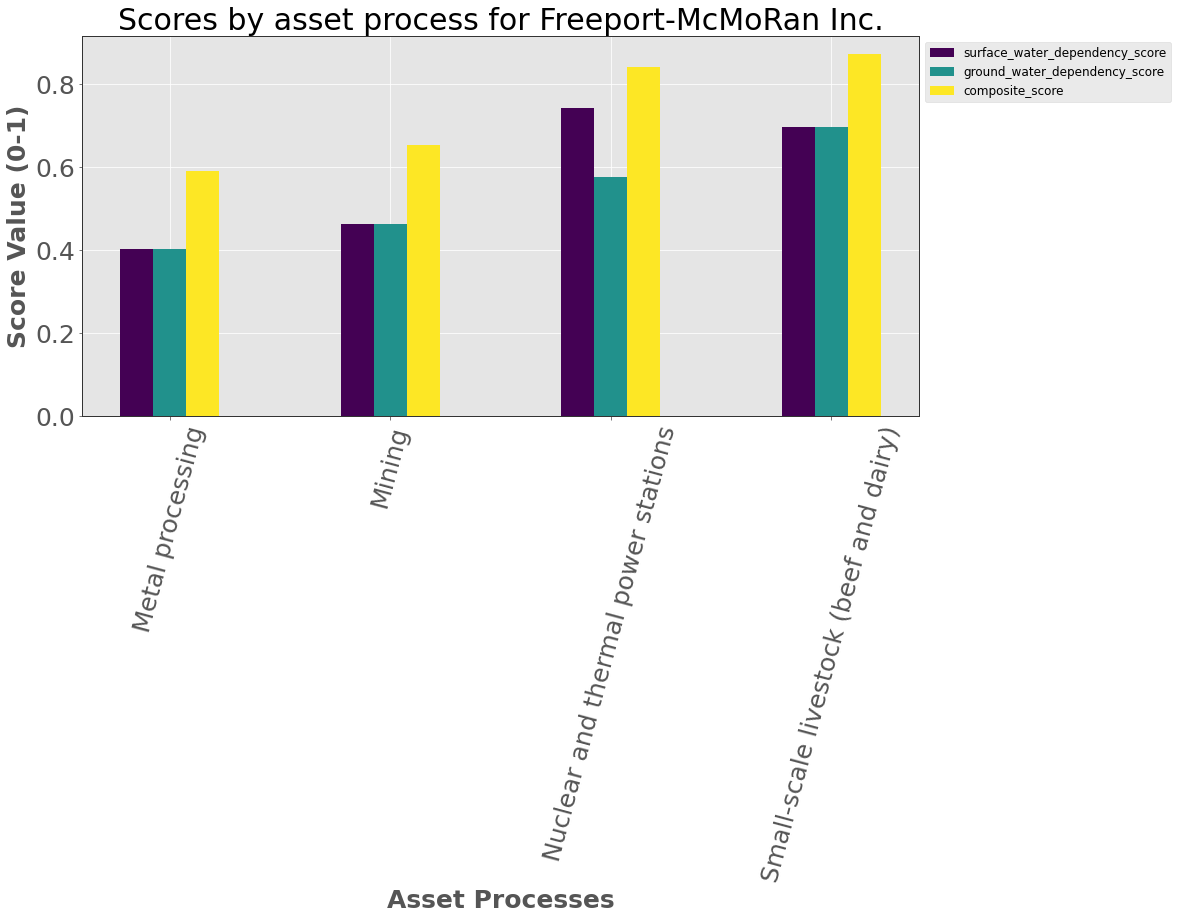

In [21]:
score_names_2 = [ 'surface_water_dependency_score',
               'ground_water_dependency_score',
               'composite_score']

for company in asset_type_dependency_name['ultimate_parent_name'].unique():
    company_df = asset_type_dependency_name[asset_type_dependency_name['ultimate_parent_name'] == company]
    sf.plot_company_scores(company_df,score_names_2)
    

# Section 4 -  Asset Type Weight and Final Aggregate Score

In [22]:
water_intensity_company = asset_type_weight.merge(company_name).sort_values(by='water_intensity'
                                                                            ,ascending=False).drop(columns='ultimate_parent_isin').copy()

In [23]:
"""For story telling purposes I will map process with gics name as I did in water risk methodology notebook""";
#process to gics name
process_to_gics_name = {
        'Alcoholic fermentation and distilling': 'Distillers & Vintners',
        'Processed food and drink production': 'Packaged Foods & Meats',
        'Environmental and facilities services': 'Environmental & Facilities Services',
        'Marine ports and services': 'Marine Ports & Services',
        'Railway transportation': 'Rail Transportation',
        'Metal processing': 'Metal, Glass & Plastic Containers',
        'Mining': 'Diversified Metals & Mining',
        'Steel production': 'Steel',
        'Oil and gas drilling': 'Oil & Gas Drilling',
        'Oil and gas refining': 'Oil & Gas Refining & Marketing',
        'Polymerization': 'Specialty Chemicals',
        'Nuclear and thermal power stations': 'Electric Utilities',
        'Small-scale irrigated arable crops': 'Agricultural Products & Services',
        'Small-scale livestock (beef and dairy)': 'Packaged Foods & Meats'
}
# Revert the items in the dictionary
gics_name_to_process = {v: k for k, v in process_to_gics_name.items()}

water_intensity_company_ = water_intensity_company.copy()
water_intensity_company_['process'] = water_intensity_company_['gicsname'].map(gics_name_to_process)
water_intensity_company_.drop(columns='gicsname', inplace=True)
water_intensity_company_.sample(2)

,composite_score,water_intensity,weights,aggregate_score,ultimate_parent_name,process
5,0.65,191523.93,0.01,0.01,Glencore plc,Metal processing
20,0.87,3464768.12,0.29,0.26,Freeport-McMoRan Inc.,Small-scale livestock (beef and dairy)


In [24]:
water_intensity_company_[water_intensity_company_['ultimate_parent_name']=='BHP Group']

,composite_score,water_intensity,weights,aggregate_score,ultimate_parent_name,process
2,0.72,7408712.07,0.85,0.61,BHP Group,Nuclear and thermal power stations
1,0.64,779432.96,0.09,0.06,BHP Group,Mining
4,0.55,298903.01,0.03,0.02,BHP Group,Steel production
0,0.56,191523.93,0.02,0.01,BHP Group,Metal processing
3,0.27,8696.55,0.00,0.00,BHP Group,Oil and gas drilling


In [25]:
water_intensity_company_[water_intensity_company_['ultimate_parent_name']=='Freeport-McMoRan Inc.']

,composite_score,water_intensity,weights,aggregate_score,ultimate_parent_name,process
19,0.84,7408712.07,0.63,0.53,Freeport-McMoRan Inc.,Nuclear and thermal power stations
20,0.87,3464768.12,0.29,0.26,Freeport-McMoRan Inc.,Small-scale livestock (beef and dairy)
18,0.65,779432.96,0.07,0.04,Freeport-McMoRan Inc.,Mining
17,0.59,191523.93,0.02,0.01,Freeport-McMoRan Inc.,Metal processing


In [26]:
water_intensity_company_[water_intensity_company_['ultimate_parent_name']=='Glencore plc']

,composite_score,water_intensity,weights,aggregate_score,ultimate_parent_name,process
7,0.92,7408712.07,0.36,0.33,Glencore plc,Nuclear and thermal power stations
15,0.95,3464768.12,0.17,0.16,Glencore plc,Small-scale livestock (beef and dairy)
14,0.81,3464768.12,0.17,0.14,Glencore plc,Small-scale livestock (beef and dairy)
10,0.41,2064711.29,0.10,0.04,Glencore plc,Environmental and facilities services
16,0.75,1995988.28,0.10,0.07,Glencore plc,Small-scale irrigated arable crops
12,0.47,841960.64,0.04,0.02,Glencore plc,Oil and gas refining
6,0.70,779432.96,0.04,0.03,Glencore plc,Mining
13,0.41,319164.26,0.02,0.01,Glencore plc,Polymerization
11,0.48,257854.32,0.01,0.01,Glencore plc,Marine ports and services
5,0.65,191523.93,0.01,0.01,Glencore plc,Metal processing


In [27]:
#From Riskier TO less Risky
company_score =  aggregate_score.merge(company_name).sort_values(by='aggregate_score', ascending=False).drop(columns='ultimate_parent_isin')

In [28]:
company_score

,weights,aggregate_score,ultimate_parent_name
2,1.00,0.83,Freeport-McMoRan Inc.
1,1.00,0.80,Glencore plc
0,1.00,0.70,BHP Group


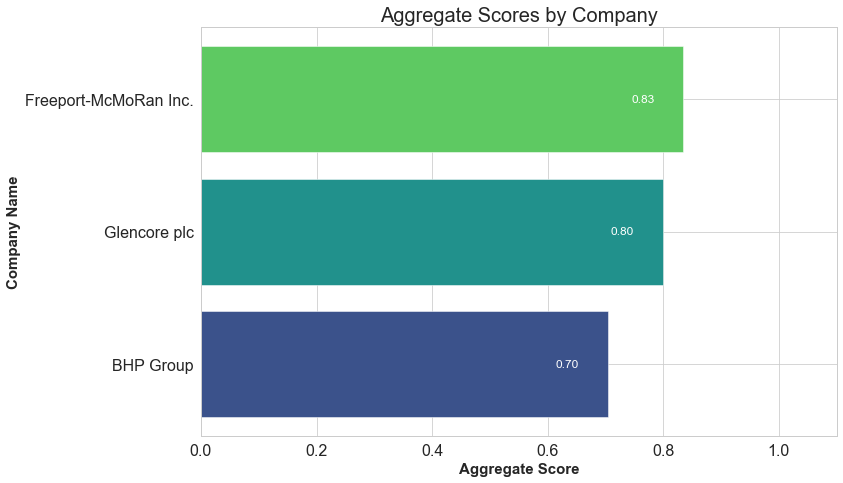

In [29]:
sf.plot_aggregate_scores(company_score)